# Linear Regression

Ways of fitting a line to a set of points (samples) are here reported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

%matplotlib inline

# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)

### Mean Absolute Error

<img src="./images/02_MAE.png" alt="Drawing" style="width: 400px;"/>
 
\begin{equation*}
MAE = \frac{1}{m} \sum_{k=1}^n | y - \hat{y} |
\end{equation*}

### Mean Squared Error

<img src="./images/01_MSE.png" alt="Drawing" style="width: 400px;"/>

\begin{equation*}
MSE = \frac{1}{2m} \sum_{k=1}^n \left( y - \hat{y} \right)^2
\end{equation*}

NOTE: there is a factor 2 at the bottom to ease the calculus of its derivative - avoid a multiplication by 2.

### Mean vs Total Squared (or Absolute) Error

It doesn't really matter which one to use. Since

\begin{equation*}
MSE = \frac{1}{2m} \sum_{k=1}^n \left( y - \hat{y} \right)^2  
 while 
MSE = \frac{1}{2} \sum_{k=1}^n \left( y - \hat{y} \right)^2
\end{equation*}

\begin{equation*}
m \cdot MSE = TSE
\end{equation*}

the total squared error is just a multiple of the mean squared error. However, the gradient descent step consists of subtracting the gradient of the error times the learning rate α.

Therefore, choosing between the mean squared error and the total squared error really just amounts to picking a different learning rate. NOTE: if you use an algorithm to pick the learning rate, it will return different lr for different error functions.

### Absolute vs Squared

When MAE is used, parallel lines are equivalent, whereas MSE pick the equi-distant from them. Therefore:
  * MAE evaluates how the points are distributed
  * MSE evaluates how the points are distributed and how far they are

The image below shows two lines which are evaluated the same but MAE, but not for MSE:

<img src="./images/03_MAE-constant.png" alt="Drawing" style="width: 400px;"/>

### Gradient descent

Is the direction which leads to the absolute minimum (indeed, the Error function here has only one). The derivative must be calculated against all variables.

<img src="./images/00_GD.png" alt="Drawing" style="width: 600px;"/> 

\begin{equation*}
a_{i+1} = a_i - \alpha \nabla E(a_i)
\end{equation*}

Where:</br>
  * $a \in \mathbb{R}^n$ is the sample point vector
  * $E$ is the error function $\mathbb{R}^n \Rightarrow \mathbb{R}$, and must be differentiable at $a$
  * $\alpha$ is the learning rate (here, we suppose it is constant - otherwise would be $\alpha_i$ - this could happen when annealing is performed)</br>

Questions:
How should A be? Rank? Determinant? Eigenvalues? Eigenvectors?

#### Limitations
For some cases, gradient descent is relatively slow close to the minimum. For poorly conditioned convex problems, gradient descent increasingly 'zigzags' as the gradients point nearly orthogonally to the shortest direction to a minimum point.

For non-differentiable functions, gradient methods are ill-defined. Therefore we must:
use non-descent methods, (e.g. subgradient projection methods) are typically slower than gradient descent
"smooth" the function, or bound the function by a smooth function. In this approach, the smooth problem is solved in the hope that the answer is close to the answer for the non-smooth problem (occasionally, this can be made rigorous)
Mini-Batch GD
For computational limitations, data is split into mini-batches with uniform size

#### Gradent descent code

In [2]:
# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Fill in code
    
    # NOTE
    # W.shape => (1,)
    # X.shape => (20,1) - it is a batch
    # y.shape => (20,)
    # type(b) => int
    
    # np.matmul takes two arguments (X,Y) 
    # where shapes are [(m,k),(k,n)] and returns a [(m,n)]
    # 
    # suppose you have two vectors:
    # 
    # case A: (m,1),(1,n)
    # all as above
    #
    # case B: (m,1),(1,)  
    # Y.shape = (1,) => second ardument is one object
    # Y is broadcasted as (1,1) by prepending a 1
    # matmul(X,Y).shape = (m,)
    
    #shapes summary: (20,1) x (1,) => (20,)
    # input shapes: (20,1) x (1,) 
    # oper. shapes: (20,1) x (1,1) => (20,1)
    # output shape: (20,1) => (20,)
    y_pred = np.matmul(X,W) + b
    error = y - y_pred
    
    # update w_1
    # 
    # W = W -grad(E(X))
    # where error function E(X) = y - F(X)
    # and grad(E(X)) = E(X) x X
    # 
    # shapes summary: (20,) x (20,) => (1,)
    # input shapes: (20,) x (20,) 
    # oper. shapes: (1,20) x (20,1) => (1,1)  --prepend,append rule: https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html
    # output shape: (1,1) => (1,)
    W_new = W + np.matmul(error, X) * learn_rate
    
    # update w_2
    # 
    # b = b - sum(error)
    # 
    # shapes summary: sum(20,) => (1,) => int
    # 
    b_new = b + sum(error) * learn_rate
    
    return W_new,b_new#W_new, b_new

#### Batch

In [3]:
# The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

#### Run Code

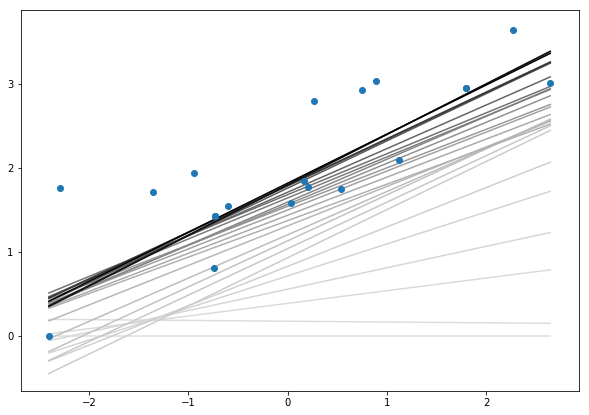

In [4]:
X = np.array([[-0.60116],[-0.94159],[-0.74565],[ 0.89583],[ 2.277  ],[-1.36115],[ 1.11943],[ 0.5336 ],[ 1.79466],[ 1.79466],[-0.73591],[ 0.20174],[ 0.03256],[ 2.64837],[ 0.74678],[ 0.26851],[-2.40724],[-0.73591],[ 0.16278],[-2.29674]])
y = np.array([ 1.54254e+00,  1.94500e+00,  8.11940e-01,  3.04041e+00,  3.63838e+00,
               1.70969e+00,  2.08990e+00,  1.75136e+00,  2.95265e+00,  2.95265e+00,
               1.43076e+00,  1.76894e+00,  1.58565e+00,  3.01665e+00,  2.92253e+00,
               2.79202e+00, -1.56000e-03,  1.43076e+00,  1.84746e+00,  1.75695e+00])

#store all the regression coefficients in an array
regression_coef = miniBatchGD(X, y)

# plot the results
plt.figure(figsize=(10,7))
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

### Linear Regression

Excercise: LR for BMI (Body Mass index)

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [17]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv(r"data\bmi_and_life_expectancy.csv") 
x = np.array(bmi_life_data['BMI'])
x = x.reshape((-1,1)) #reshape by grafing the items (one feature per sample)
y = np.array(bmi_life_data['Life expectancy'])

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(x,y)

# Make a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])
laos_life_exp


array([60.31564716])

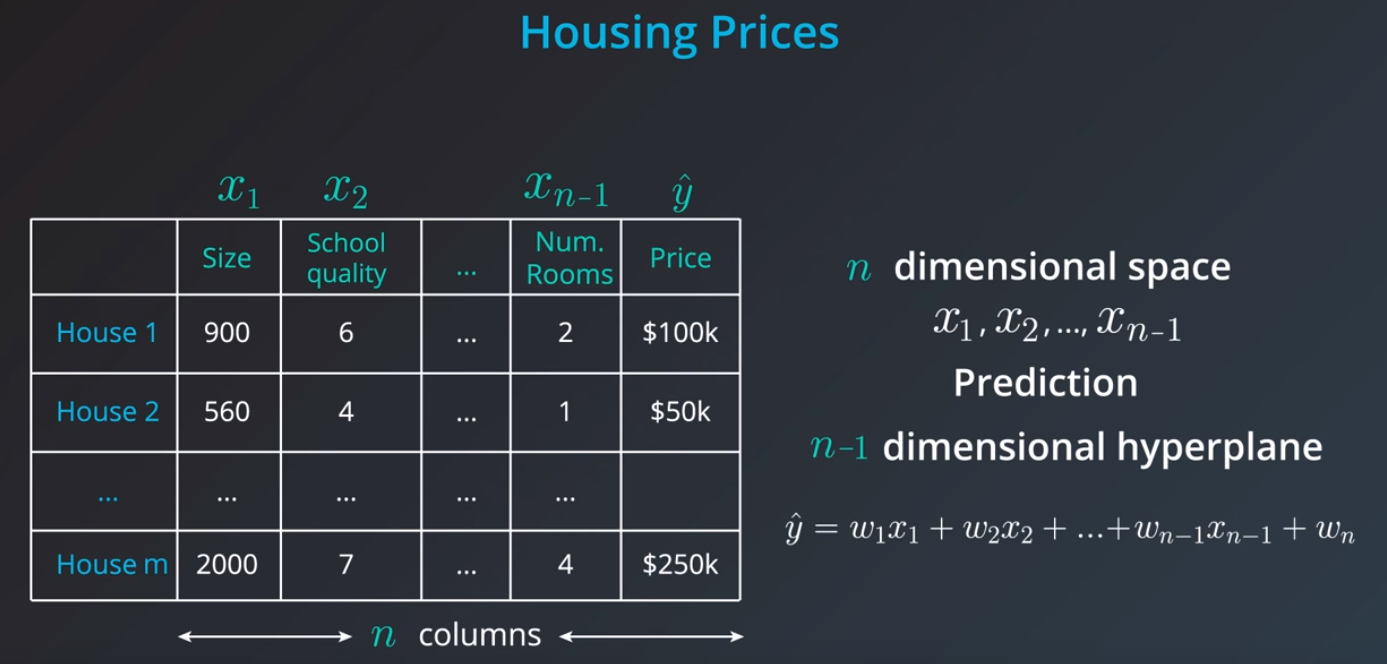

In [30]:
# TODO: Add import statements
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv(r"data\data_1.csv")
X = np.array(train_data['Var_X']).reshape(-1,1)
y = np.array(train_data['Var_Y'])
X

array([[-0.33532],
       [ 0.0216 ],
       [-1.19438],
       [-0.65046],
       [-0.28001],
       [ 1.93258],
       [ 1.2262 ],
       [ 0.74727],
       [ 3.32853],
       [ 2.87457],
       [-1.48662],
       [ 0.37629],
       [ 1.43918],
       [ 0.24183],
       [-2.7914 ],
       [ 1.08176],
       [ 2.81555],
       [ 0.54924],
       [ 2.36449],
       [-1.01925]])

In [53]:
# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(4) #3 looks more reasonable, but it is not the solution for udacity
X_poly = poly_feat.fit_transform(X,y)

X_poly[:2]

array([[ 1.00000000e+00, -3.35320000e-01,  1.12439502e-01,
        -3.77032139e-02,  1.26426417e-02],
       [ 1.00000000e+00,  2.16000000e-02,  4.66560000e-04,
         1.00776960e-05,  2.17678234e-07]])

In [54]:
x_test = np.array((np.arange(min(X),max(X),0.2))).reshape(-1,1)
x_test_poly = poly_feat.fit_transform(x_test)

x_test_poly[:2] #first two items

array([[  1.        ,  -2.7914    ,   7.79191396, -21.75034863,
         60.71392316],
       [  1.        ,  -2.5914    ,   6.71535396, -17.40216825,
         45.09597881]])

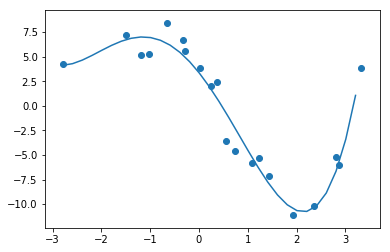

In [56]:
# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression()
poly_model.fit(X_poly,y)

# Once you've completed all of the steps, select Test Run to see your model
# predictions against the data, or select Submit Answer to check if the degree
# of the polynomial features is the same as ours!

y_test = poly_model.predict(x_test_poly)
plt.plot(x_test,y_test)
plt.scatter(X,y)
plt.show()

### Regularization

Regularization compares models with different complexity (degree). More complex models are penalized when they make mistakes than simple ones. Regularization is finally multiplied by a factor $\lambda$ to penalize more or less complex models. This is to fine tune the error in relation to the problem. 

Example: Twitter and Facebook data can have higher error and more simplicity, whereas a medical application can't afford big error values.


<img src="./images/05_L1reg.png" alt="Drawing" style="width: 600px;"/> 

<img src="./images/06_L2reg.png" alt="Drawing" style="width: 600px;"/> 

<img src="./images/07_L1vsL2.png" alt="Drawing" style="width: 600px;"/> 

#### Example

In this assignment's data.csv, you'll find data for a bunch of points including six predictor variables and one outcome variable. Use sklearn's Lasso class to fit a linear regression model to the data, while also using L1 regularization to control for model complexity.

In this example we use the `Lasso` linear model (L1 regularization). Its `.coef_` property returns a vector $l_1 \in \mathbb{R}^n$, where $n$ is the number of features. In Lasso, the multiplier $\lambda$ is called `alpha`.

NOTE: to use a cobination of $L1$ and $L2$ you can use `Elastic Net`.

In [60]:
# TODO: Add import statements
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv(r"data\data_2.csv",header=None)
train_data.head()

,0,1,2,3,4,5,6
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122


In [66]:
X = np.array(train_data.iloc[:,:6])
y = np.array(train_data.iloc[:,6:])
# reshape y?

In [7]:
# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X,y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[ 0.          2.33659619  2.0140086  -0.05753445 -3.91583673  0.        ]


### Feature Scaling

It is needed to avoid 1) distance metrics to influence the model, for distance-based models (e.g. k-means, SVM, etc) and 2) when regularization is used. FS consists of multiplying a small-scale features by a big coefficient, and a large-scale feature by a small coefficient. FS can happen by:
 * Standardization (std_dev = 1, mean = 0)
 * Normalization (min = 0, max = 1)

When you do not use FS (and you use a metric-sensitive model):
 * The small-scale feature gets unfairly penalised by the error (influenced also by the big scale feature), in relation to its actual scale
 * The model converges faster on the weights referring to the biggest scale features (might cause local minima for complex model?)

In [ ]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [10]:
# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv(r"data\data_2.csv",header=None)
X = train_data.iloc[:,:6]
y = train_data.iloc[:,6:]

# TODO: Create the standardization scaling object.
scaler = StandardScaler()
scaler.fit(X)

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.transform(X)

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X_scaled,y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_#(X_scaled,y)
print(reg_coef)

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]


### Outro

Topics covered:
  * Gradient descent as a method to optimize your linear models.
  * Multiple Linear Regression as a technique for when you are comparing more than two variables.
  * Polynomial Regression for relationships between variables that aren't linear.
  * Regularization as a technique to assure that your models will not only fit to the data available, but also extend to new situations.